<a href="https://colab.research.google.com/github/HEOJIBEOM/Maritime-Data-Minin/blob/main/11%EC%A3%BC%EC%B0%A8%20%EC%88%98%EC%97%85%EB%82%B4%EC%9A%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import pandas as pd
raw_hawaii_df = pd.read_csv('./hawaii-coviddata.csv')
raw_hawaii_df.head()

,date_updated,state,start_date,end_date,tot_cases,new_cases,tot_deaths,new_deaths,new_historic_cases,new_historic_deaths
0,01/23/2020,HI,01/16/2020,01/22/2020,0,0,0,0,0,0
1,01/30/2020,HI,01/23/2020,01/29/2020,0,0,0,0,0,0
2,02/06/2020,HI,01/30/2020,02/05/2020,0,0,0,0,0,0
3,02/13/2020,HI,02/06/2020,02/12/2020,0,0,0,0,0,0
4,02/20/2020,HI,02/13/2020,02/19/2020,0,0,0,0,0,0


In [92]:
raw_hawaii_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   date_updated         173 non-null    object
 1   state                173 non-null    object
 2   start_date           173 non-null    object
 3   end_date             173 non-null    object
 4   tot_cases            173 non-null    int64 
 5   new_cases            173 non-null    int64 
 6   tot_deaths           173 non-null    int64 
 7   new_deaths           173 non-null    int64 
 8   new_historic_cases   173 non-null    int64 
 9   new_historic_deaths  173 non-null    int64 
dtypes: int64(6), object(4)
memory usage: 13.6+ KB


In [85]:
hawaii_total_cases = raw_hawaii_df[['tot_cases', 'date_updated']]
hawaii_dateindex_df = hawaii_total_cases.set_index('date_updated')
hawaii_dateindex_df.head()

,tot_cases
date_updated,
01/23/2020,0
01/30/2020,0
02/06/2020,0
02/13/2020,0
02/20/2020,0


In [86]:
raw_la_df = pd.read_csv('./la-coviddata.csv')
la_total_cases = raw_la_df[['tot_cases', 'date_updated']]
la_dateindex_df = la_total_cases.set_index('date_updated')
la_dateindex_df.head()

,tot_cases
date_updated,
12/22/2022,1507707
03/30/2023,1588259
02/02/2023,1548508
03/23/2023,1580709
04/27/2023,1597070


In [87]:
raw_ny_df = pd.read_csv('./ny-coviddata.csv')
ny_total_cases = raw_ny_df[['tot_cases', 'date_updated']]
ny_dateindex_df = ny_total_cases.set_index('date_updated')
ny_dateindex_df.head()

,tot_cases
date_updated,
01/23/2020,0
01/30/2020,0
02/06/2020,0
02/13/2020,0
02/20/2020,0


In [113]:
raw_usa_df = pd.read_csv('./usa-coviddata.csv')
usa_total_cases = raw_usa_df[['tot_cases', 'date_updated']]
usa_dateindex_df = usa_total_cases.set_index('date_updated')
usa_dateindex_df.head()

,tot_cases
date_updated,
02/23/2023,2434631
12/22/2022,1507707
02/23/2023,3061141
03/30/2023,1588259
02/02/2023,1548508


In [88]:
hawaii_population = 1_440_000
LA_population = 3_822_000
NY_population = 8_336_000
USA_population = 338_289_856

hawaii_rate = round((hawaii_population / USA_population),3)
LA_rate = round((LA_population / USA_population),3)
NY_rate = round((NY_population / USA_population),3)
print(hawaii_rate)
print(LA_rate)
print(NY_rate)

0.004
0.011
0.025


In [89]:
ny_dateindex_df.index = pd.to_datetime(ny_dateindex_df.index)
la_dateindex_df.index = pd.to_datetime(la_dateindex_df.index)
hawaii_dateindex_df.index = pd.to_datetime(hawaii_dateindex_df.index)
hawaii_dateindex_df.index.dtype

dtype('<M8[ns]')

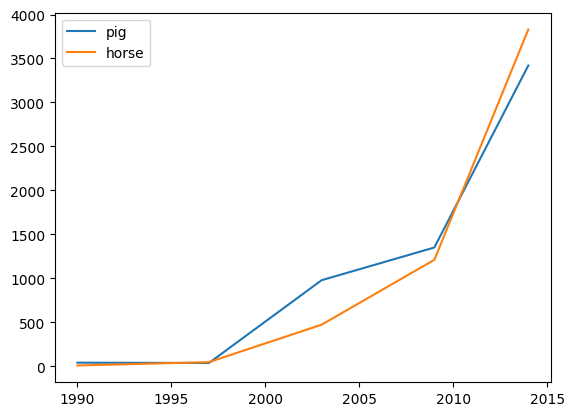

In [90]:
vision_df = pd.DataFrame({
    'pig' : [40, 36, 978, 1350, 3420],
    'horse' : [8, 46, 472, 1210, 3830]
  }, index = [1990, 1997, 2003, 2009, 2014])

pic_lines = vision_df.plot.line()

In [115]:
final_df = pd.concat([hawaii_dateindex_df * hawaii_rate,
    la_dateindex_df * LA_rate, ny_dateindex_df * NY_rate, usa_dateindex_df], axis=1)
final_df.columns = ['HAWAII', 'LA', 'NY', 'USA']
final_df.head()

InvalidIndexError: Reindexing only valid with uniquely valued Index objects